Analytics & Data Science

Universidad de Antioquia - ML2

Feb 2024

Melissa Ortega Alzate CC.1036964792

# Libraries

In [179]:
# Data manipulation
import numpy as np
from sklearn import cluster, datasets, mixture

# Visualization
import matplotlib.pyplot as plt

# klearn clustering algorithms
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn_extra.cluster import KMedoids
from sklearn import datasets
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.datasets import make_blobs

# Warnings ignoring
import warnings
warnings.filterwarnings("ignore")



# Functions

In [180]:
# Define a function to plot the results
def plot_silhouette_with_scatter(X, clusters, title='Silhouette Plot with Scatter'):
    """
    Plot silhouette coefficients and scatter plot for each sample.

    Parameters:
    - X: The feature matrix.
    - clusters: The cluster labels for each sample.
    - title: The title of the plot (default: 'Silhouette Plot with Scatter').
    """
    colors = plt.get_cmap('viridis')

    if clusters is None:  # Check if clusters are None
        print("No cluster labels provided. Skipping silhouette plot.")
        return
    
    silhouette_scores = silhouette_samples(X, clusters)
    num_clusters = len(np.unique(clusters))
    y_lower = 10
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    fig.suptitle(title, fontsize=11, fontweight='bold')
    
    # Scatter plot
    scatter = axes[0].scatter(X[:, 0], X[:, 1], c=clusters, cmap=colors, s=30, edgecolors='k')
    axes[0].set_title('Clustered data')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    axes[0].grid(False)
    axes[0].legend(*scatter.legend_elements(), title="Clusters")
    
    # Silhouette plot
    axes[1].set_title('Silhouette plot')

    for i in range(num_clusters):
        ith_cluster_silhouette_values = silhouette_scores[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = colors(i / num_clusters)  # Use same color for silhouette plot as in scatter plot
        axes[1].fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              alpha=0.7, facecolor = color)
        axes[1].text(-0.03, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    axes[1].set_xlabel("Silhouette coefficient")
    axes[1].set_ylabel("Cluster label")
    
    plt.tight_layout()
    plt.show()


In [181]:
def clustering_algorithm(X, algorithm, n_clusters=None, dbscan_eps=None, dbscan_min_samples=None):
    """
    Apply a clustering algorithm to a given dataset and compute the silhouette score.

    Parameters:
    X (array-like): Input dataset.
    algorithm (str): Name of the clustering algorithm (Eg. 'KMeans' or 'Spectral').
    n_clusters (int, optional): Number of clusters. Default is None.
    dbscan_eps (float, optional): The maximum distance between two samples for one to be considered as in the neighborhood of the other (DBSCAN parameter). Default is None.
    dbscan_min_samples (int, optional): The number of samples (or total weight) in a neighborhood for a point to be considered as a core point (DBSCAN parameter). Default is None.

    Returns:
    labels (array): Cluster labels assigned to each sample.
    score (float): Silhouette score computed for the dataset and cluster labels.

    """
    algorithms = {
        'KMeans': KMeans(n_clusters=n_clusters, random_state=42),
        'KMedoids': KMedoids(n_clusters=n_clusters, random_state=42),
        'DBSCAN': DBSCAN(eps=dbscan_eps, min_samples=dbscan_min_samples),  
        'Spectral': SpectralClustering(n_clusters=n_clusters, random_state=42)
    }
    
    model = algorithms[algorithm]
    y_pred = model.fit_predict(X)

    try:
        score = silhouette_score(X, y_pred)
    except:
        score = None
        
    return y_pred, score


# 1 y 2. Spectral Clustering and DBSCAN

In [197]:
# See DBSCAN and Spectral Clustering PDF file. Disclaimer: the content of the file is in Spanish.

# 3. What is the elbow method in clustering? And which flaws does it pose to assess quality?

The elbow method is a technique used to determine the **optimal number of clusters** in a dataset. The fundamentals consist of calculate how similar are the data points of a determinated cluster for different k values.

It involves plotting the sum of squared distances between each point and the centroid of its assigned cluster for different values of k. So, the point where the decrease in WCSS slows down significantly, is considered the optimal number of clusters.

In [182]:
# Create sample data
X, _ = make_blobs(n_samples=500, random_state=42)

# Calculate inertia for different values of k
inertia = []
for k in range(1, 11): 
    kmeans = KMeans(n_clusters=k, max_iter=100, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

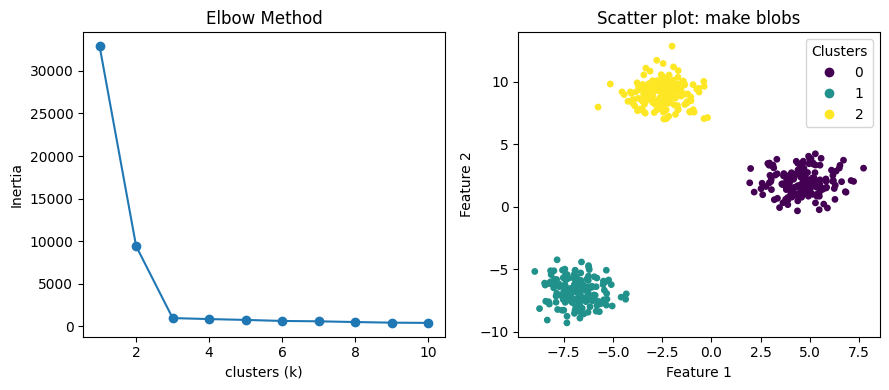

In [183]:
# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Elbow plot
axs[0].plot(range(1, 11), inertia, marker='o')
axs[0].set_xlabel('clusters (k)')
axs[0].set_ylabel('Inertia')
axs[0].set_title('Elbow Method')

# Scatter plot
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
y_pred = kmeans.fit_predict(X)
scatter = axs[1].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=15)
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')
axs[1].set_title('Scatter plot: make blobs')

# Styling
legend1 = axs[1].legend(*scatter.legend_elements(), title="Clusters")
plt.tight_layout()
plt.show()


The elbow method is simple and easy to understand, it has some flaws:

- **Subjectivity:** Determining the exact point of the elbow can be subjective and depends on visual interpretation.
- **Not always clear:** In some cases, the plot may not exhibit a clear elbow point.
- **Sensitivity to noise:** The elbow method may be sensitive to noise or outliers in the data.
- **Dependent on initialization:** The result can vary depending on the initial centroids chosen, especially in algorithms like K-means.

**Additional resources:**

- https://uc-r.github.io/kmeans_clustering
- https://www.youtube.com/watch?v=ht7geyMAFfA

# 4. Implementing K-means and K-medoids

### 4a. K-means

silueta para mis métodos

In [184]:
X = np.random.rand(7,5)
K = 3                       

In [185]:
from unsupervised.clusters.kmeans import KMEANS

kmeans = KMEANS()            # Crea una instancia de la clase KMEANS
clusters = kmeans.fit(K, X)  # Ejecuta el algoritmo de K-means

# Muestra los resultados
print("Clusters:", clusters)

Initial random centroids:
 [[0.73945253 0.71002342 0.36972767 0.66831149 0.94328962]
 [0.82788333 0.1926193  0.86136672 0.32612601 0.08384904]
 [0.29209261 0.55739184 0.73713533 0.36915945 0.26349393]]

Final centroids:
 [[0.79022307 0.62474604 0.20697226 0.49076525 0.92777923]
 [0.81816788 0.27135118 0.81572918 0.18455266 0.25863631]
 [0.17943494 0.52643127 0.62050574 0.71068697 0.27098236]]

Clusters: [2. 2. 1. 0. 1. 2. 0.]


In [186]:
new_data = np.random.rand(7,5)

# Predecir los clusters para los nuevos datos
predicted_clusters = kmeans.predict(new_data)

print("Predicted clusters:", predicted_clusters)

Predicted clusters: [2. 2. 0. 1. 2. 1. 1.]


clusters es un array de NumPy que contiene los índices de clúster para todas las muestras de datos en X. Cada elemento del array corresponde a una muestra (fila) de datos en X y contiene el índice del clúster al que pertenece esa muestra. Por lo tanto, cluster_indices es un array unidimensional. Cada valor en este array representa el índice del clúster asignado a la muestra de datos correspondiente en X.

entonces a la fila 1, le toco el cluster 0
a la fila 2

### 4b. K-medioids

In [187]:
from unsupervised.clusters.kmedoids import KMedoids

# Crear instancia de KMedoids
kmedoids = KMedoids()

# Datos de ejemplo (sustitúyelos con tus propios datos)
X = np.random.rand(7, 5)
K = 3

# Calcular clusters con K-medoids
clusters = kmedoids.fit(K, X)

# Imprimir clusters obtenidos
print("Clusters:", clusters)

Medoids iniciales:
[[0.9912348  0.71825818 0.01680466 0.00836443 0.48104688]
 [0.47636553 0.08847815 0.42737238 0.71227728 0.12938702]
 [0.91490108 0.33280164 0.18914045 0.78862564 0.83369536]]

Clusters: [0. 1. 2. 1. 0. 0. 1.]


# 5. Let’s use the newly created modules in unsupervised

### 5a. Use the following code snippet to create scattered data X

In [188]:
# Generate sparse data X
X, y = make_blobs(
    n_samples= 500,   # Number of samples (rows)
    n_features= 2,    # Number of features (columns)
    centers= 4,       # Number of clusters
    cluster_std= 1,   # Standard deviation of clusters (how close data points are to their cluster)
    center_box= (-10.0, 10.0),
    shuffle=True,
    random_state= 1
)

In [189]:
# Data description
print(f"X is an array with {X.shape[0]} data points and {X.shape[1]} features")
print(f"y is an array with {y.shape} labels to verify clusterization")

X is an array with 500 data points and 2 features
y is an array with (500,) labels to verify clusterization


### 5b. Plot the resulting dataset

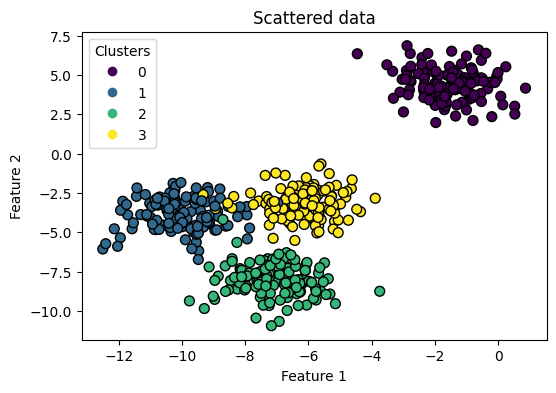

In [190]:
# Dataset plotting
plt.figure(figsize=(6, 4))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50, edgecolors='k')
plt.title('Scattered data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(False)
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


### How many clusters are there? How far are they from one another? 
By using the make blobs function, 4 centroids were predefined. Also an standard deviation of each cluster was specified as 1.  This parameter controls how close data points are to their corresponding cluster. 

A higher value for "cluster_std" would result in clusters being farther apart, while a lower value would make them closer together.

### 5c. For both k-means and k-medoids (your implementations), calculate the silhouette, etc.

### K-means

Number of clusters (K): 2
Initial random centroids:
 [[-7.16744245 -3.24998378]
 [-6.65461644 -7.29335713]]

Final centroids:
 [[-1.54234022  4.43517599]
 [-7.75782734 -5.03639416]]

K-means silhouette score: 0.7049787496083262


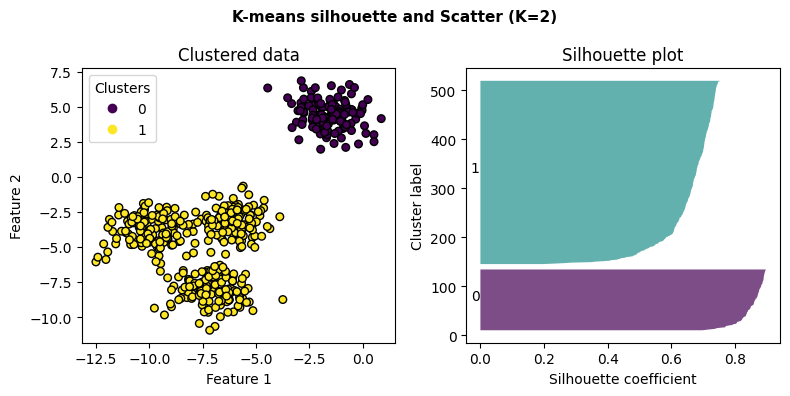

Number of clusters (K): 3
Initial random centroids:
 [[ -8.24598536  -8.61315821]
 [-11.53650575  -4.40124373]
 [-10.19276984  -3.14795512]]

Final centroids:
 [[-7.09306648 -8.10994454]
 [-8.0862351  -3.5179868 ]
 [-1.54234022  4.43517599]]

K-means silhouette score: 0.5882004012129721


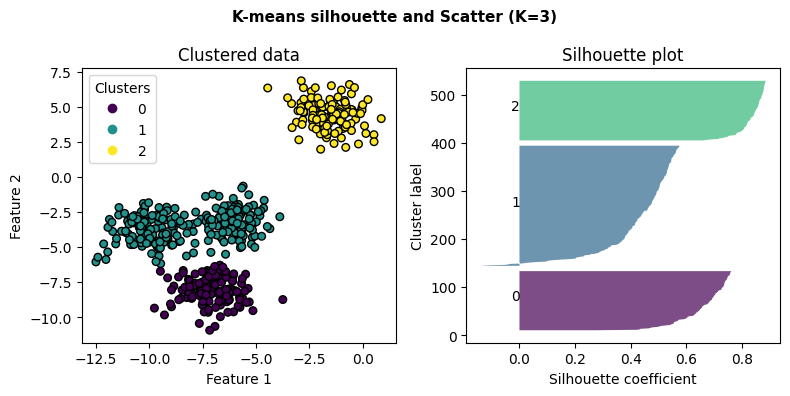

Number of clusters (K): 4
Initial random centroids:
 [[-9.14500844 -3.91798845]
 [-7.12425009 -6.7042387 ]
 [-5.26910909 -2.73521824]
 [-8.87430034 -3.64808151]]

Final centroids:
 [[-10.00969056  -3.84944007]
 [ -7.09306648  -8.10994454]
 [ -1.54234022   4.43517599]
 [ -6.08459039  -3.17305983]]

K-means silhouette score: 0.6505186632729437


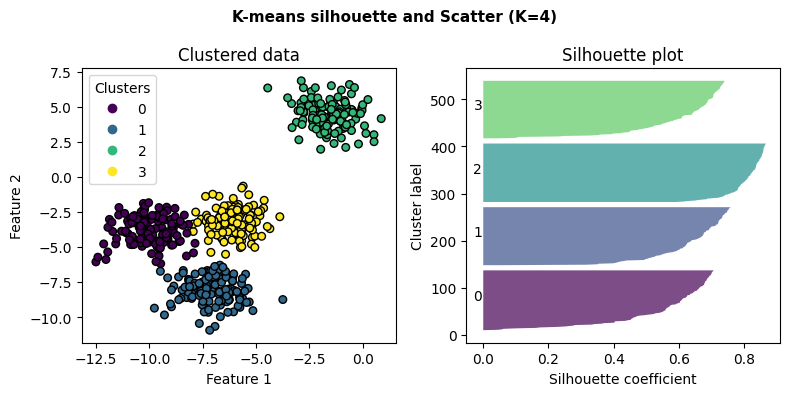

Number of clusters (K): 5
Initial random centroids:
 [[-7.34774574 -8.41955499]
 [-6.69321189 -6.30021862]
 [-6.65461644 -7.29335713]
 [-5.48941428 -6.94662021]
 [-0.03190915  4.74450157]]

Final centroids:
 [[ -7.93935027  -8.37628254]
 [-10.00969056  -3.84944007]
 [ -6.39658927  -7.85626949]
 [ -6.08177529  -3.15381201]
 [ -1.54234022   4.43517599]]

K-means silhouette score: 0.5662344175321901


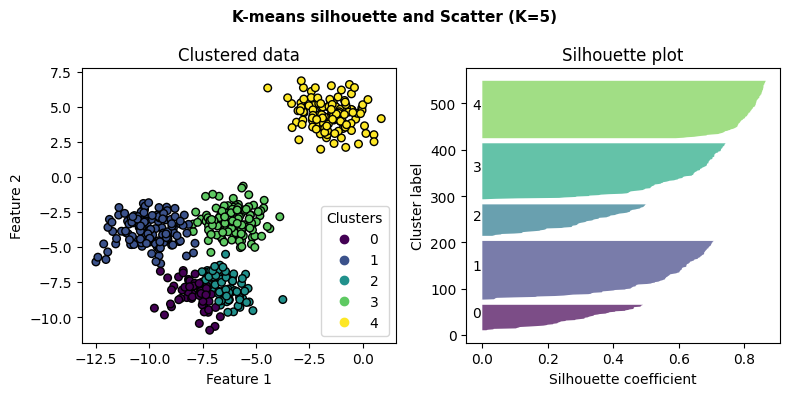

In [191]:
# Import necessary libraries
from unsupervised.clusters.kmeans import KMEANS

# Iterate over K values from 2 to 5
for K in range(2, 6):
    print(f"Number of clusters (K): {K}")

    # K-means implementation
    kmeans = KMEANS()
    kmeans_clusters = kmeans.fit(K, X)
    
    # Compute silhouette score for K-means
    kmeans_silhouette = silhouette_score(X, kmeans_clusters)
    print("K-means silhouette score:", kmeans_silhouette)

    # Plot silhouette and scatter using defined function
    plot_silhouette_with_scatter(X, kmeans_clusters, title=f"K-means silhouette and Scatter (K={K})")


### What number of K got the best silhouette score? What can you say about the figures? Is this the expected result?
- Despite the data being generated to cluster into 4 groups, the silhouette score indicates that the best differentiation between the groups was when K=2 (0.704978), following by K=4 (0.650518). This might occur when the separation between clusters isn't very wide, and the algorithm finds that the data could be more naturally grouped into 2 clusters. 

- The results also indicate that with K=5, the model may be overfitting, i.e. trying to find more clusters than necessary. This iteration got the lowest silhouette score: 0,573821.

- Given the silhouette figures, where K=2 and K=4 had the highest scores, in K=4 there aren't many silhouette coefficient values lower than 0.6. So choosing between 2 and 4 clusters would depend on the specific use case, domain knowledge, and other business factors. It's essential to consider the interpretability of the clusters and the goals of the analysis.

### k-medioids

Number of clusters (K): 2
Medoids iniciales:
[[-6.11013071 -2.31061128]
 [-5.26910909 -2.73521824]]

K-means silhouette score: 0.7049787496083262


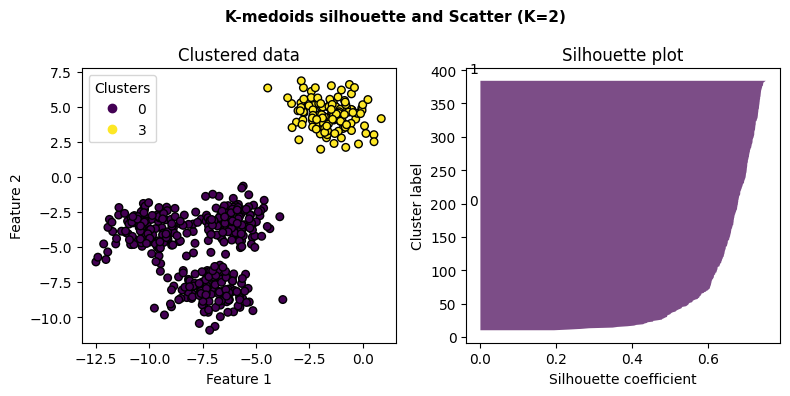

Number of clusters (K): 3
Medoids iniciales:
[[-1.47299851  4.81654152]
 [-9.375909   -4.55315308]
 [-6.14254799 -3.65202206]]

K-means silhouette score: 0.49261897315715214


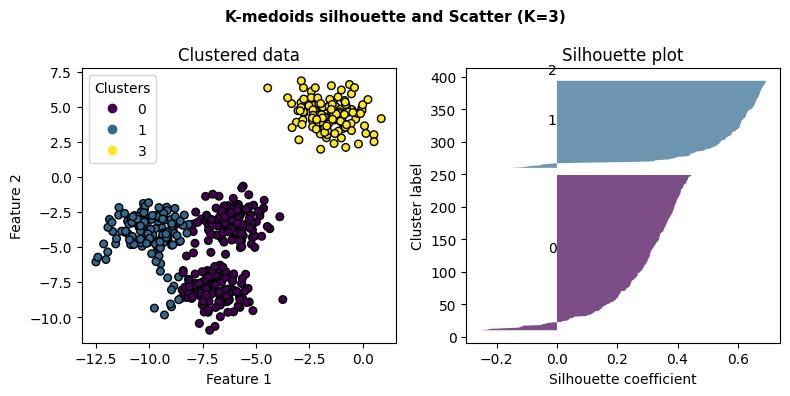

Number of clusters (K): 4
Medoids iniciales:
[[ -1.84048021   3.80256924]
 [ -9.54609655  -2.84917422]
 [ -7.87372938  -7.59578865]
 [-10.82017969  -3.23163726]]

K-means silhouette score: 0.6486608287961805


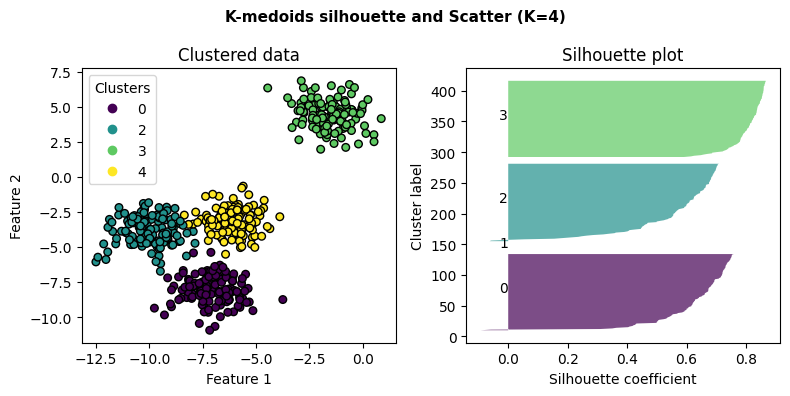

Number of clusters (K): 5
Medoids iniciales:
[[-1.61589091  4.18017563]
 [-5.68475631 -3.76816924]
 [ 0.8687658   4.15785509]
 [-0.75870396  3.72276201]
 [-7.62867092 -8.0635417 ]]

K-means silhouette score: 0.4579357947500273


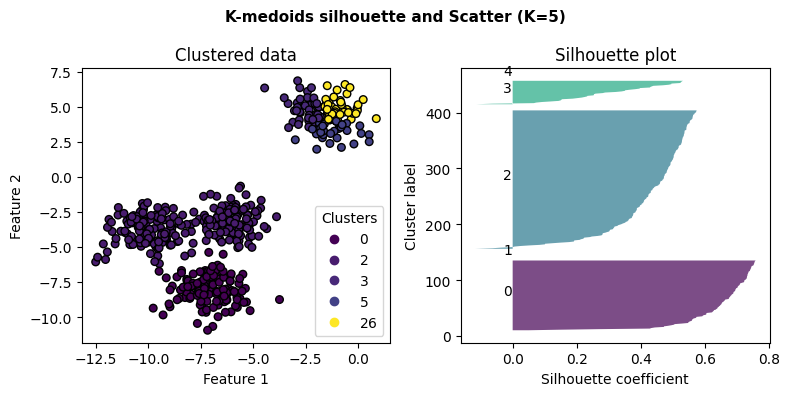

In [192]:
# Import necessary libraries
from unsupervised.clusters.kmedoids import KMedoids

# Iterate over K values from 2 to 5
for K in range(2, 6):
    print(f"Number of clusters (K): {K}")

    # K-means implementation
    Kmedoids = KMedoids()
    Kmedoids_clusters = Kmedoids.fit(K, X)
    
    # Compute silhouette score for K-means
    Kmedoids_silhouette = silhouette_score(X, Kmedoids_clusters)
    print("K-means silhouette score:", Kmedoids_silhouette)

    # Plot silhouette and scatter using defined function
    plot_silhouette_with_scatter(X, Kmedoids_clusters, title=f"K-medoids silhouette and Scatter (K={K})")


# 6. Create different types of data

In [193]:
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropically distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
varied = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

In each dataset, X is a matrix with 500 rows and two columns, representing the *x* and *y* coordinates of the points. In other words, it contains 500 pairs of points. Additionally, *y* is a vector containing the labels corresponding to each data point.

- noisy_circles: The labels represent whether the point belongs to the inner or outer circle.
- noisy_moons: The labels represent whether the point belongs to the upper or lower semicircle.
- blobs: The labels represent the different groups or clusters to which the points belong.
- aniso: it is a transformated blobs data set
- varied: it is a blobs data set with different std for each cluster


### 6a. Plot the different datasets in separate figures. What can you say about them?

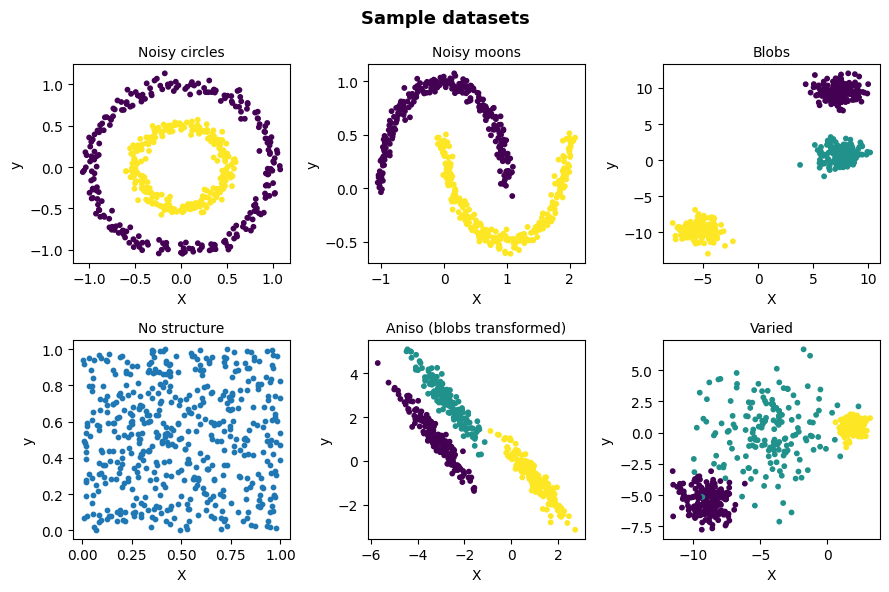

In [194]:
# Define variables
datasets_list = [noisy_circles, noisy_moons, blobs, no_structure, aniso, varied]
titles = ['Noisy circles', 'Noisy moons', 'Blobs', 'No structure', 'Aniso (blobs transformed)', 'Varied']

# Plot the different datasets
fig, axs = plt.subplots(2, 3, figsize=(9, 6))
fig.suptitle('Sample datasets', fontsize=13, fontweight='bold')

for i, dataset in enumerate(datasets_list):
    row = i // 3
    col = i % 3
    X, y = dataset
    axs[row, col].scatter(X[:, 0], X[:, 1], c=y, s=10)
    axs[row, col].set_title(titles[i], fontsize=10)
    axs[row, col].set_xlabel('X')
    axs[row, col].set_ylabel('y')
    
plt.tight_layout()
plt.show()


### 6b. Apply k-means, k-medoids, DBSCAN and Spectral Clustering from Scikit-Learn over each dataset

In [195]:
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
from sklearn_extra.cluster import KMedoids


=== Silhouette Scores for Noisy circles
Silhouette Score KMeans: 0.3446291281349746
Silhouette Score KMedoids: 0.35266043052631973
Silhouette Score DBSCAN: None


Silhouette Score Spectral: 0.35266847846617


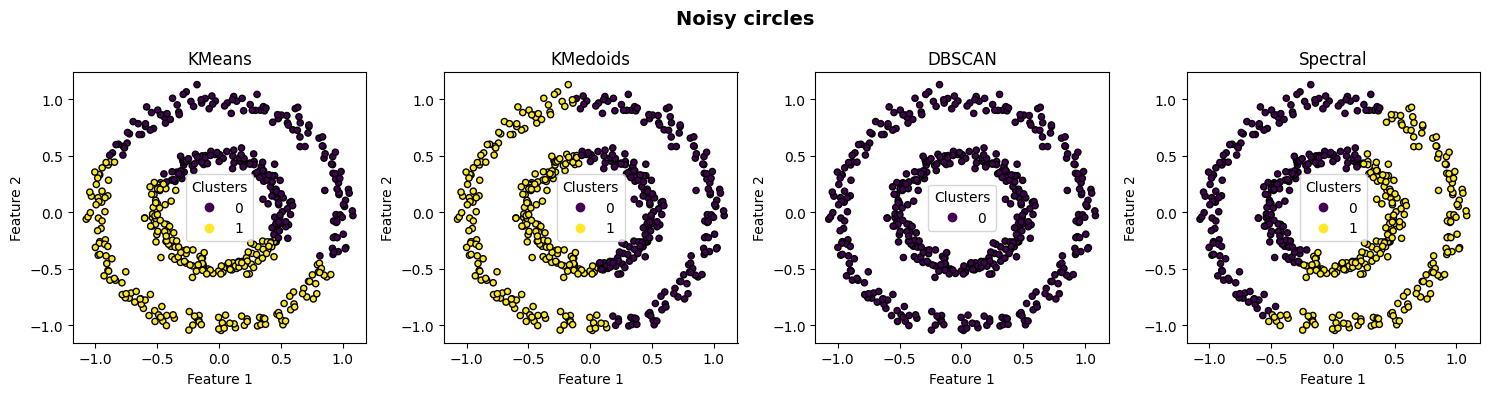


=== Silhouette Scores for Noisy moons
Silhouette Score KMeans: 0.49372925637186327
Silhouette Score KMedoids: 0.4932458162612885
Silhouette Score DBSCAN: None
Silhouette Score Spectral: 0.49459130294554904


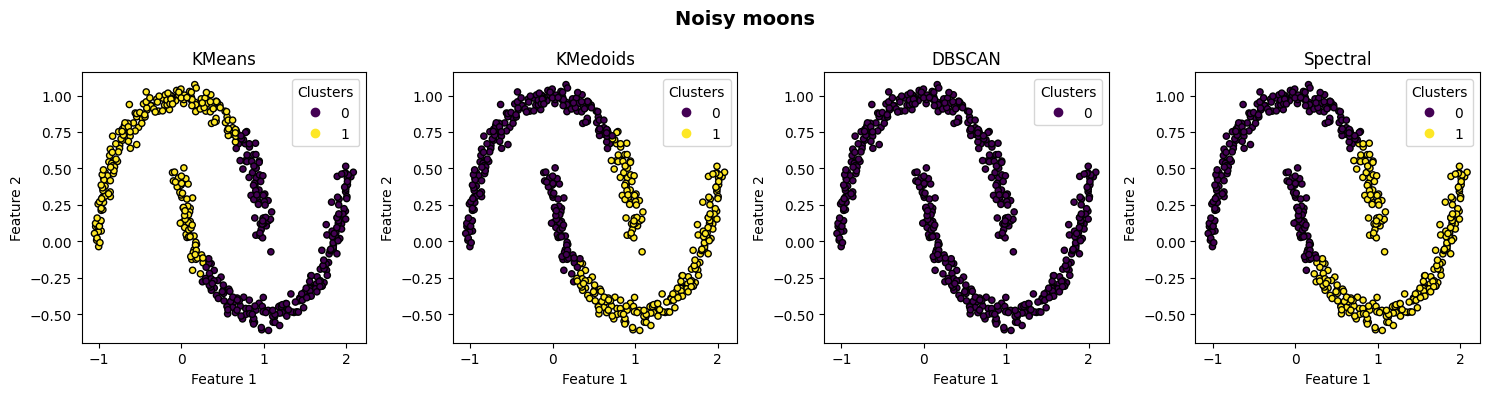


=== Silhouette Scores for Blobs
Silhouette Score KMeans: 0.7851727153851467
Silhouette Score KMedoids: 0.7851727153851467
Silhouette Score DBSCAN: 0.4001585427439608
Silhouette Score Spectral: 0.7851727153851467


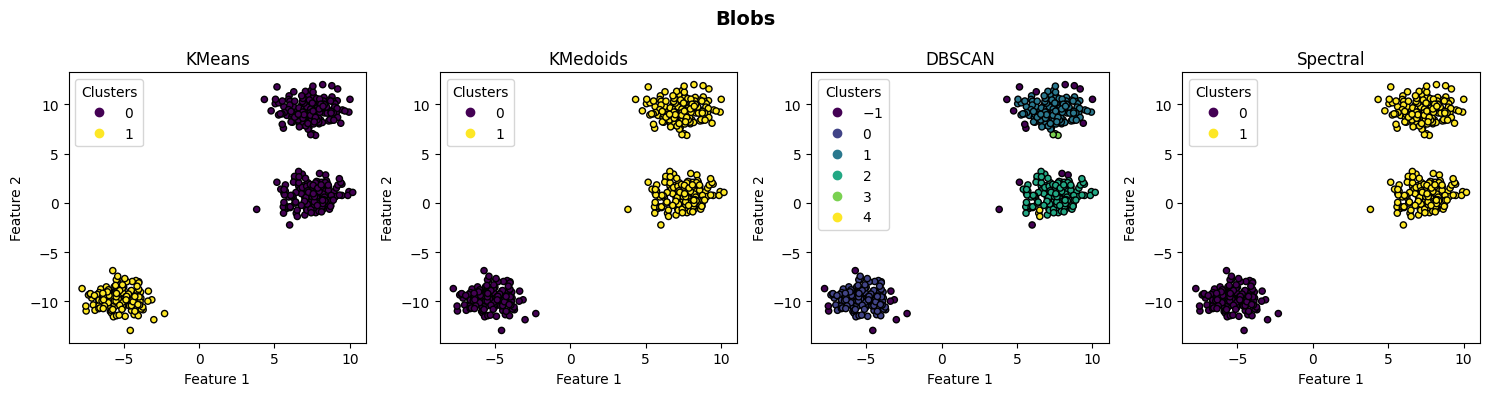


=== Silhouette Scores for No structure
Silhouette Score KMeans: 0.3528589556992161
Silhouette Score KMedoids: 0.3354636969567058
Silhouette Score DBSCAN: None
Silhouette Score Spectral: 0.32620877118121144


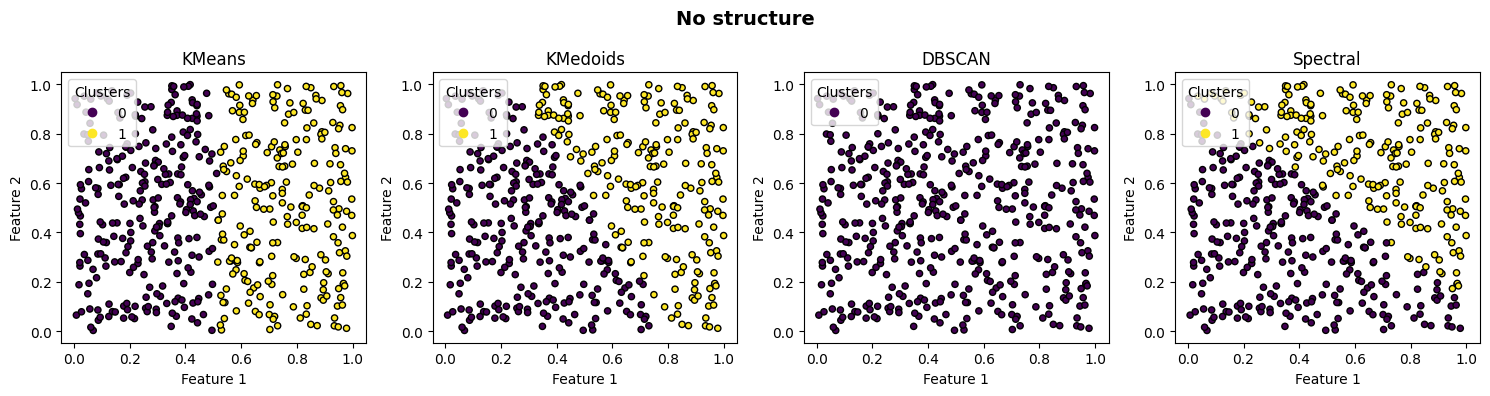


=== Silhouette Scores for Aniso (blobs transformed)
Silhouette Score KMeans: 0.6346291254246498
Silhouette Score KMedoids: 0.6322189569625475
Silhouette Score DBSCAN: 0.14981732239321058
Silhouette Score Spectral: 0.6354933647035526


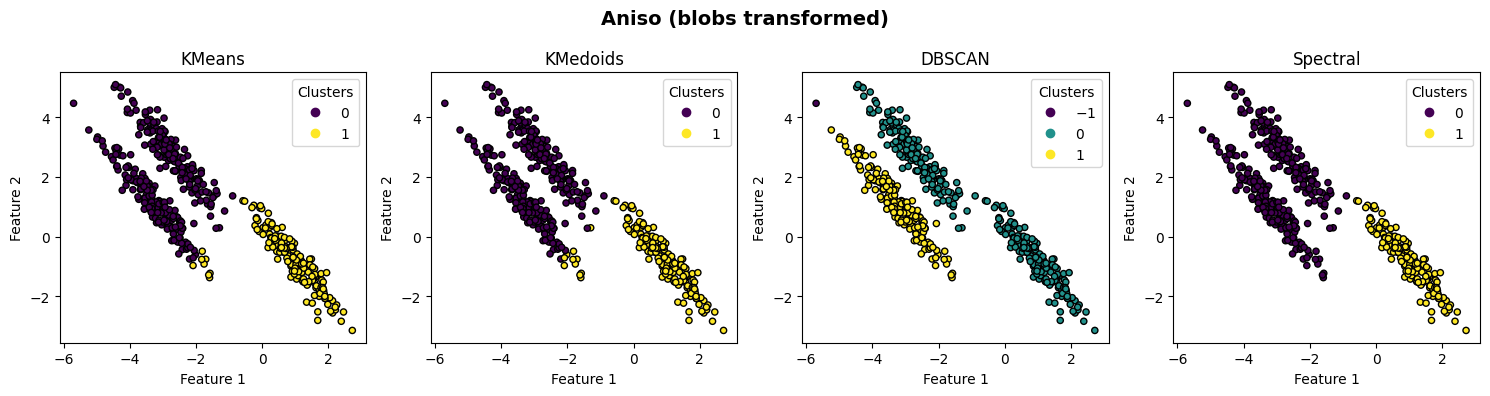


=== Silhouette Scores for Varied
Silhouette Score KMeans: 0.6214908974783163
Silhouette Score KMedoids: 0.6166504208971609
Silhouette Score DBSCAN: 0.33599434040612514
Silhouette Score Spectral: 0.615514632969388


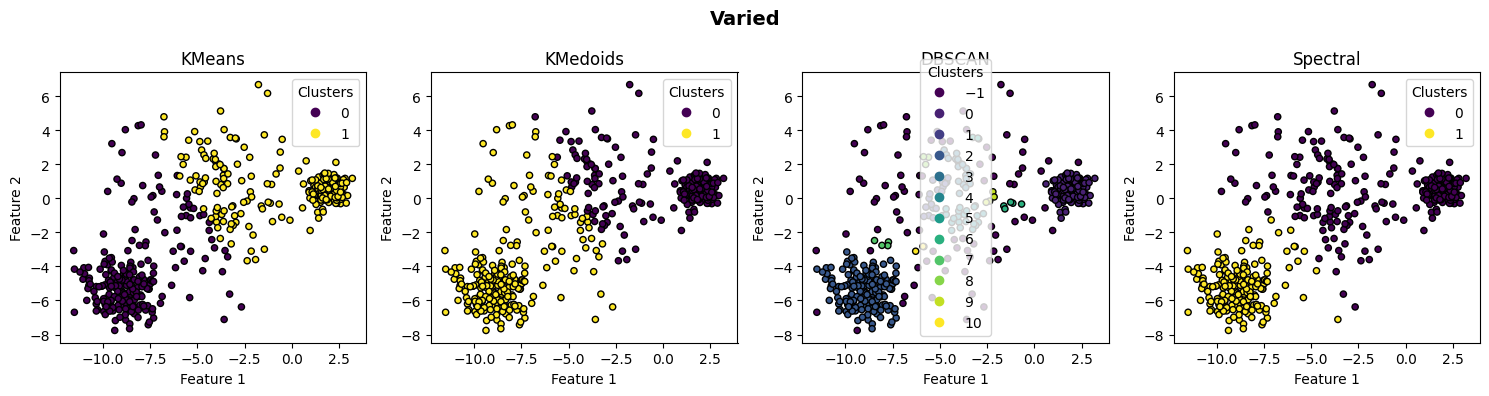

In [196]:
# Define the number of clusters for the algorithms
n_clusters = 2

# Define the list of clustering algorithms to compare
algorithms = ['KMeans', 'KMedoids', 'DBSCAN', 'Spectral']

# Define subplots layout
num_rows = 1
num_cols = len(algorithms)

# Apply every clustering algorithm to each dataset
for i, dataset in enumerate(datasets_list):
    X, _ = dataset
    
    print(f"\n=== Silhouette Scores for {titles[i]}")
    
    # Create subplots for each algorithm
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4))
    fig.suptitle(f"{titles[i]}", fontsize=14, fontweight='bold')
    axes = axes.flatten() 
    
    for j, algorithm in enumerate(algorithms):
        y_pred, score = None, None
        
        # Check if the algorithm is DBSCAN
        if algorithm == 'DBSCAN':            
            y_pred, score = clustering_algorithm(X, algorithm, dbscan_eps = 0.5, dbscan_min_samples=3)
        else:
            y_pred, score = clustering_algorithm(X, algorithm, n_clusters=n_clusters)
            
        print(f"Silhouette Score {algorithm}: {score}")
        
        # Plot scatter plot for each algorithm
        colors = plt.get_cmap('viridis')
        scatter = axes[j].scatter(X[:, 0], X[:, 1], c=y_pred, cmap=colors, s=20, edgecolors='k')
        axes[j].set_title(f"{algorithm}", )
        axes[j].set_xlabel('Feature 1')
        axes[j].set_ylabel('Feature 2')
        axes[j].grid(False)
        axes[j].legend(*scatter.legend_elements(), title="Clusters")
        
    plt.tight_layout()
    plt.show()



The results show that to select the appropriate algorithm for clustering the data, it is necessary to consider the properties of each one along with the characteristics of the dataset. 
The "Algorithms comparision" document, presents a tabular comparision of these algorithms (in Spanish).

# Bibliografy 

- Platzi. "Curso de Clustering con Python y scikit-learn". Disponible en: https://platzi.com/cursos/clustering/

- FreeCodeCamp Español. "8 algoritmos de agrupación en clústeres en el aprendizaje automático que todos los científicos de datos deben conocer". Disponible en: https://www.freecodecamp.org/espanol/news/8-algoritmos-de-agrupacion-en-clusteres-en-el-aprendizaje-automatico-que-todos-los-cientificos-de-datos-deben-conocer/


- Sajal Srivastava. "Coding K-means Clustering using Python and NumPy". Disponible en: https://dev.to/sajal2692/coding-k-means-clustering-using-python-and-numpy-fg1

- Ruslan Klymentiev. "MLAlgorithms/kmeans.py". Disponible en: https://github.com/rushter/MLAlgorithms/blob/035e489a879d01a84fffff74885dc6b1bca3c96f/mla/kmeans.py


**Playgrounds**

- Harris, Naftali. "Visualizing K-Means Clustering". Disponible en: https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

- Harris, Naftali. "Visualizing DBSCAN Clustering". Disponible en: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/


**Documentation**

- Scikit-learn. "sklearn.cluster.KMeans". Disponible en: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

- Scikit-learn. "Plot KMeans on Iris Dataset". Disponible en: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html#sphx-glr-auto-examples-cluster-plot-cluster-iris-py

**Videos**

- Super Data Science (2023, feb 21). The Elbow Method Explained in Less than 5 minutes [video]. YouTube. https://www.youtube.com/watch?v=ht7geyMAFfA
- StatQuest (2022, ene 10). Clustering with DBSCA [video]. YouTube. https://www.youtube.com/watch?v=RDZUdRSDOok


# To-do

- conservar los colores de los cluster con el de las silueta

1. puntos 1
4. discusion punto 6b
5. discusion punto 5 kmedoids
3. kmediods mio
